In [1]:
## Importing required libraries
import pandas as pd #for data preprocessing

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

from datetime import datetime

from sklearn.model_selection import KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV,train_test_split #For splitting

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

import warnings

from sklearn.preprocessing import LabelEncoder,OneHotEncoder 

In [2]:
#Import Datasets: train.csv, test.csv
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')

In [3]:
#Create submission file using an empty/dummy dataframe
submission_file = pd.DataFrame(columns=['ID', 'Response'])
submission_file.head() 

#Save test ID in a copy for creating submission file later
submission_file.ID = test_data.ID
submission_file.head()

,ID,Response
0,ID_ZPMABNVX,NaN
1,ID_WFE91NAA,NaN
2,ID_JV11RBRK,NaN
3,ID_6B7SVKY9,NaN
4,ID_GOVUZ545,NaN


In [4]:
#Check for missing values
train_data.isnull().sum()

ID                          0
Year_of_Birth               0
Education_Level             0
Marital_Status              0
Disposable_Income          16
No_of_Kids_in_home          0
No_of_Teen_in_home          0
Date_Customer               0
Recency                     0
Discounted_Purchases        0
WebPurchases                0
CatalogPurchases            0
StorePurchases              0
Amount_on_Wines             0
Amount_on_Fruits            0
Amount_on_MeatProducts      0
Amount_on_FishProducts      0
Amount_on_SweetProducts     0
Amount_on_GoldProds         0
WebVisitsMonth              0
Cmp3Accepted                0
Cmp4Accepted                0
Cmp5Accepted                0
Cmp1Accepted                0
Cmp2Accepted                0
Any_Complain                0
Response                    0
dtype: int64

In [5]:
test_data.isnull().sum()

ID                         0
Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          8
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
dtype: int64

In [6]:
#Check for dtypes in train and test datasets with .info method
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1568 non-null   object 
 1   Year_of_Birth            1568 non-null   int64  
 2   Education_Level          1568 non-null   object 
 3   Marital_Status           1568 non-null   object 
 4   Disposable_Income        1552 non-null   float64
 5   No_of_Kids_in_home       1568 non-null   int64  
 6   No_of_Teen_in_home       1568 non-null   int64  
 7   Date_Customer            1568 non-null   object 
 8   Recency                  1568 non-null   int64  
 9   Discounted_Purchases     1568 non-null   int64  
 10  WebPurchases             1568 non-null   int64  
 11  CatalogPurchases         1568 non-null   int64  
 12  StorePurchases           1568 non-null   int64  
 13  Amount_on_Wines          1568 non-null   int64  
 14  Amount_on_Fruits        

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       672 non-null    object 
 1   Year_of_Birth            672 non-null    int64  
 2   Education_Level          672 non-null    object 
 3   Marital_Status           672 non-null    object 
 4   Disposable_Income        664 non-null    float64
 5   No_of_Kids_in_home       672 non-null    int64  
 6   No_of_Teen_in_home       672 non-null    int64  
 7   Date_Customer            672 non-null    object 
 8   Recency                  672 non-null    int64  
 9   Discounted_Purchases     672 non-null    int64  
 10  WebPurchases             672 non-null    int64  
 11  CatalogPurchases         672 non-null    int64  
 12  StorePurchases           672 non-null    int64  
 13  Amount_on_Wines          672 non-null    int64  
 14  Amount_on_Fruits         6

In [8]:
#Drop ID column and convert Date column to Datetime

#Drop ID from train and test datasets
train_data.drop('ID', axis=1, inplace=True)
test_data.drop('ID', axis=1, inplace=True)

In [34]:
#Convert Datetime
train_data['Date_Customer'] = pd.to_datetime(train_data['Date_Customer'],infer_datetime_format=True)
test_data['Date_Customer'] = pd.to_datetime(test_data['Date_Customer'],infer_datetime_format=True)

In [35]:
train_data['Date_Customer']=train_data['Date_Customer'].apply(lambda x: x.toordinal())
test_data['Date_Customer']=test_data['Date_Customer'].apply(lambda x: x.toordinal())

In [37]:
#Check the data info again

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_of_Birth            1568 non-null   int64  
 1   Education_Level          1568 non-null   int64  
 2   Marital_Status           1568 non-null   int64  
 3   Disposable_Income        1568 non-null   float64
 4   No_of_Kids_in_home       1568 non-null   int64  
 5   No_of_Teen_in_home       1568 non-null   int64  
 6   Date_Customer            1568 non-null   int64  
 7   Recency                  1568 non-null   int64  
 8   Discounted_Purchases     1568 non-null   int64  
 9   WebPurchases             1568 non-null   int64  
 10  CatalogPurchases         1568 non-null   int64  
 11  StorePurchases           1568 non-null   int64  
 12  Amount_on_Wines          1568 non-null   int64  
 13  Amount_on_Fruits         1568 non-null   int64  
 14  Amount_on_MeatProducts  

In [38]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_of_Birth            672 non-null    int64  
 1   Education_Level          672 non-null    int64  
 2   Marital_Status           672 non-null    int64  
 3   Disposable_Income        672 non-null    float64
 4   No_of_Kids_in_home       672 non-null    int64  
 5   No_of_Teen_in_home       672 non-null    int64  
 6   Date_Customer            672 non-null    int64  
 7   Recency                  672 non-null    int64  
 8   Discounted_Purchases     672 non-null    int64  
 9   WebPurchases             672 non-null    int64  
 10  CatalogPurchases         672 non-null    int64  
 11  StorePurchases           672 non-null    int64  
 12  Amount_on_Wines          672 non-null    int64  
 13  Amount_on_Fruits         672 non-null    int64  
 14  Amount_on_MeatProducts   6

In [ ]:
train

In [44]:
#We can separate catgorical and numerical column

#categorical_columns == categorical columns excluding Date column
categorical_columns = train_data.select_dtypes(include=['object', 'category']).columns

#numerical_columns == numerical columns + date column included
numerical_columns = [col for col in train_data.columns if col not in categorical_columns]

print(f'The categorical columns are: {categorical_columns}')

print(f'The numerical columns are: {numerical_columns}')

The categorical columns are: Index([], dtype='object')
The numerical columns are: ['Year_of_Birth', 'Education_Level', 'Marital_Status', 'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home', 'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases', 'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines', 'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts', 'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth', 'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted', 'Cmp2Accepted', 'Any_Complain', 'Response']


In [45]:
#categ_cols == categorical columns . Date column excluded
categorical_columns = test_data.select_dtypes(include=['object', 'category']).columns

#numerical_columns == numerical columns + date column included
numerical_columns = [col for col in test_data.columns if col not in categorical_columns]
print(f'The categorical columns are: {categorical_columns}')

print(f'The numerical columns are: {numerical_columns}')

The categorical columns are: Index([], dtype='object')
The numerical columns are: ['Year_of_Birth', 'Education_Level', 'Marital_Status', 'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home', 'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases', 'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines', 'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts', 'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth', 'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted', 'Cmp2Accepted', 'Any_Complain']


In [46]:
#check for unique entries in each categorical column

for col in categorical_columns:
    print(f'Unique entries in the {col} column in the train set is: {train_data[col].nunique()}')
    
    print(f'and the unique entries are: {train_data[col].unique()}')

In [47]:
for col in categorical_columns:
    print(f'Unique entries in the {col} column in the test set is: {test_data[col].nunique()}')
    
    print(f'and the unique entries are: {test_data[col].unique()}')

In [48]:
#check unique entries in Target column

print(f'Unique entries in the Target column in  is: {train_data.Response.nunique()}')
print(f'and the unique entries are: {train_data.Response.unique()}')

Unique entries in the Target column in  is: 2
and the unique entries are: [0 1]


In [49]:
#Filling missing values using the mean method for train and test datasets

train_data['Disposable_Income'].dtype

train_data['Disposable_Income'].fillna((train_data['Disposable_Income'].mean()) , inplace = True)
#check again to make sure
train_data.isnull().sum()

Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          0
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
Response                   0
dtype: int64

In [50]:
test_data['Disposable_Income'].fillna((test_data['Disposable_Income'].mean()) , inplace = True)
#check again to make sure
test_data.isnull().sum()

Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          0
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
dtype: int64

In [51]:
#Read train and test datasets again

print(f'The Size of the train set is now: {train_data.shape}')
train_data.head()

The Size of the train set is now: (1568, 26)


,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,1955,2,2,77504.4,1,1,735406,56,2,1,...,6,20,3,0,0,0,0,0,0,0
1,1958,2,5,56784.0,0,1,734876,17,6,5,...,15,19,6,0,0,0,0,0,0,0
2,1962,2,4,103714.8,0,0,735193,17,0,7,...,18,37,2,0,0,0,1,0,0,1
3,1979,0,4,46311.6,1,0,735124,49,3,4,...,24,24,8,0,0,0,0,0,0,0
4,1959,2,3,87486.0,0,0,735254,59,1,3,...,165,203,1,0,0,0,1,0,0,0


In [52]:
print(f'The Size of the train set is now: {test_data.shape}')
test_data.head()

The Size of the train set is now: (672, 25)


,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,...,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
0,1954,2,3,48556.8,0,1,735173,85,6,8,...,7,23,41,8,0,0,0,0,0,0
1,1961,2,5,57499.2,0,1,734829,79,5,7,...,0,0,75,6,0,1,0,0,0,0
2,1973,1,2,17025.6,0,0,734927,47,1,2,...,16,12,27,6,0,0,0,0,0,0
3,1970,2,4,91983.6,0,0,735096,98,1,4,...,219,189,126,2,0,0,1,1,0,0
4,1959,2,4,78235.2,0,2,735074,41,2,7,...,12,0,200,5,1,0,0,0,0,0


In [53]:
#Encoding Categorical Variables

# label encoding 
len = LabelEncoder()
for i in categorical_columns:
    train_data[i] = len.fit_transform(train_data[i])
    test_data[i] = len.fit_transform(test_data[i])
train_data.head()

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,1955,2,2,77504.4,1,1,735406,56,2,1,...,6,20,3,0,0,0,0,0,0,0
1,1958,2,5,56784.0,0,1,734876,17,6,5,...,15,19,6,0,0,0,0,0,0,0
2,1962,2,4,103714.8,0,0,735193,17,0,7,...,18,37,2,0,0,0,1,0,0,1
3,1979,0,4,46311.6,1,0,735124,49,3,4,...,24,24,8,0,0,0,0,0,0,0
4,1959,2,3,87486.0,0,0,735254,59,1,3,...,165,203,1,0,0,0,1,0,0,0


In [54]:
#Build a model from the data
#Split into X and y


X = train_data.drop('Response', axis=1)
y = train_data.Response

#Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
#Import GradientBoostingClassifier and create a model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(solver='svd', shrinkage=None, priors=None, n_components=None, 
                                       store_covariance=False, tol=0.0001)

In [56]:

#Training Catboost Model on train set
lda = lda.fit(X_train,y_train)

In [58]:
y_pred = lda.predict(X_test)

In [59]:
#Evaluating model using f1_score
print("lda F1 score on validation set is : ",f1_score(y_test,y_pred))

lda F1 score on validation set is :  0.5142857142857143


In [60]:
#Now Predict on Test set
lda_preds = lda.predict(test_data)

In [61]:
#Save prediction to submission file created earlier
submission_file.Response = lda_preds
submission_file.head()

,ID,Response
0,ID_ZPMABNVX,0
1,ID_WFE91NAA,0
2,ID_JV11RBRK,0
3,ID_6B7SVKY9,1
4,ID_GOVUZ545,0


In [62]:
#Save to Csv for submission
submission_file.to_csv('lda_model.csv', index=False)

In [72]:
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)
from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)
from sklearn.metrics import (confusion_matrix, accuracy_score)
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [73]:
random_state = 2
models = [] # append all models or predictive models 
cv_results = [] # cross validation result
cv_means = [] # cross validation mean value
cv_std = [] # cross validation standard deviation
K_fold = StratifiedKFold(n_splits=10)

In [74]:
models.append(RandomForestClassifier(random_state=random_state))
models.append(LinearDiscriminantAnalysis())
models.append(GradientBoostingClassifier(random_state=random_state))
models.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),
                                 random_state=random_state,learning_rate=0.1))

In [75]:
for model in models :
    cv_results.append(cross_val_score(model, X_train, y_train, 
                                      scoring = "accuracy", cv = K_fold, n_jobs=4))

In [76]:
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [77]:
cv_frame = pd.DataFrame(
    {
        "CrossValMeans":cv_means,
        "CrossValErrors": cv_std,
        "Algorithms":[
                     "AdaBoost",    
                     "RandomForest",
                     "GradientBoosting",                      
                     "LinearDiscriminantAnalysis"]
    })

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


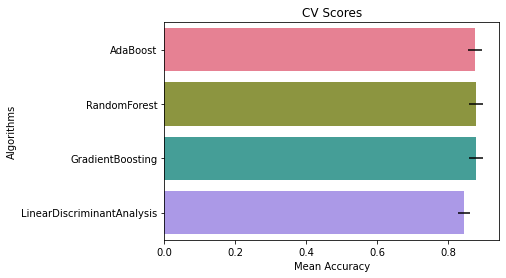

In [80]:
cv_plot = sns.barplot("CrossValMeans","Algorithms", data = cv_frame,
                palette="husl", orient = "h", **{'xerr':cv_std})

cv_plot.set_xlabel("Mean Accuracy")
cv_plot = cv_plot.set_title("CV Scores")

In [79]:
#Let's start with Gradient Boosting Classifier.

In [82]:
# GBC Classifier
GBC_Model = GradientBoostingClassifier()

scores = cross_val_score(GBC_Model, X_train, y_train, cv = K_fold,
                       n_jobs = 4, scoring = 'accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.88095238 0.86507937 0.88095238 0.85714286 0.904      0.856
 0.92       0.88       0.864      0.888     ]


87.96

In [83]:
# Random Forest Classifier Model
#
RFC_model = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(RFC_model, X_train, y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.85714286 0.83333333 0.8968254  0.83333333 0.856      0.832
 0.888      0.864      0.88       0.88      ]


86.21

In [85]:
# Linear Discriminant Analysis 
LDA_Model= LinearDiscriminantAnalysis()

scores = cross_val_score(LDA_Model, X_train, y_train, cv = K_fold,
                       n_jobs = 4, scoring = 'accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.88888889 0.87301587 0.88888889 0.83333333 0.872      0.864
 0.912      0.896      0.88       0.888     ]


87.96

In [87]:
# Gradient boosting tunning
GBC = GradientBoostingClassifier()
gb_param_grid = {
              'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01, 0.001],
              'max_depth': [4, 8,16],
              'min_samples_leaf': [100,150,250],
              'max_features': [0.3, 0.1]
              }

gsGBC = GridSearchCV(GBC, param_grid = gb_param_grid, cv=K_fold, 
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,y_train)
GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   21.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   50.7s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:  3.6min
[Parallel(n_jobs=4)]: Done 2160 out of 2160 | elapsed:  4.6min finished


0.8740253968253968

In [95]:
y_pred_gsGBC = gsGBC.predict(X_test)

In [100]:
#Evaluating model using f1_score
print("gsGBC F1 score on validation set is : ",f1_score(y_test, y_pred_gsGBC))

gsGBC F1 score on validation set is :  0.39999999999999997


In [101]:
gsGBC_preds = gsGBC.predict(test_data)

In [110]:
#Save prediction to submission file created earlier
submission_file.Response = gsGBC_preds 
submission_file.head()

,ID,Response
0,ID_ZPMABNVX,0
1,ID_WFE91NAA,0
2,ID_JV11RBRK,0
3,ID_6B7SVKY9,0
4,ID_GOVUZ545,0


In [111]:
#Save to Csv for submission
submission_file.to_csv('gsGBC_model.csv', index=False)

In [112]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 4, 16],
              "n_estimators" :[100,200,300,400],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC, param_grid = rf_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)
RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   19.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed:  2.2min finished


0.8828126984126984

In [113]:
y_pred_gsRFC = gsRFC.predict(X_test)

In [114]:
#Evaluating model using f1_score
print("gsRFC F1 score on validation set is : ",f1_score(y_test,y_pred_gsRFC))

gsRFC F1 score on validation set is :  0.37931034482758624


In [115]:
gsRFC_preds = gsRFC.predict(test_data)

In [116]:
submission_file.Response = gsRFC_preds
submission_file.head()

,ID,Response
0,ID_ZPMABNVX,0
1,ID_WFE91NAA,0
2,ID_JV11RBRK,0
3,ID_6B7SVKY9,0
4,ID_GOVUZ545,0


In [117]:
#Save to Csv for submission
submission_file.to_csv('gsRFC_model.csv', index=False)

In [118]:
# Linear Discriminant Analysis - Parameter Tuning
LDA = LinearDiscriminantAnalysis()

## Search grid for optimal parameters
lda_param_grid = {"solver" : ["svd"],
              "tol" : [0.0001,0.0002,0.0003]}


gsLDA = GridSearchCV(LDA, param_grid = lda_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsLDA.fit(X_train,y_train)
LDA_best = gsLDA.best_estimator_

# Best score
gsLDA.best_score_

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    0.7s finished


0.8796126984126985

In [119]:
y_pred_gsLDA = gsLDA.predict(X_test)

In [120]:
#Evaluating model using f1_score
print("gsLDA F1 score on validation set is : ",f1_score(y_test, y_pred_gsLDA))

gsLDA F1 score on validation set is :  0.5142857142857143


In [121]:
#Now Predict on Test set
gsLDA_preds = gsLDA.predict(test_data)

In [122]:
submission_file.Response = gsLDA_preds
submission_file.head()

,ID,Response
0,ID_ZPMABNVX,0
1,ID_WFE91NAA,0
2,ID_JV11RBRK,0
3,ID_6B7SVKY9,1
4,ID_GOVUZ545,0


In [123]:
#Save to Csv for submission
submission_file.to_csv('gsLDA_model.csv', index=False)